In [1]:
import os
import json
import shutil

import cv2
from PIL import Image
import numpy as np
import tqdm

## Make Datasets

- trainset 80%
- testset 20%

### Step One: shuffle data

In [2]:
kavsir_home = '../datasets/Kvasir-SEG'
kavsir_meta_path = os.path.join(kavsir_home, 'kavsir_bboxes.json')
kavsir_images = os.path.join(kavsir_home, 'images')
kavsir_masks = os.path.join(kavsir_home, 'masks')
new_dataset_home = './aam_datasets'
new_train_images = os.path.join(new_dataset_home, 'trainset')
new_test_images = os.path.join(new_dataset_home, 'testset')
kavsir_meta: dict = json.load(open(kavsir_meta_path, 'r', encoding='utf-8'))

image_names = os.listdir(kavsir_images)
image_indice = np.arange(len(image_names))
train_image_indice = np.random.choice(image_indice, size=int(len(image_indice) * 0.8))
test_image_indice = np.array(list(set(image_indice) - set(train_image_indice)))

### Step Two: transform data to mask

In [42]:
def mask2points(mask: np.ndarray, point_num: int) -> np.ndarray:
    edge = cv2.Canny(mask, 50, 150)
    contours, _ = cv2.findContours(edge, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    roi_points = contours[0].reshape(-1, 2)
    roi_point_num = len(roi_points)
    if roi_point_num > point_num:
        indices = np.arange(0, roi_point_num, roi_point_num // point_num)
        roi_points = roi_points[indices]
    return roi_points[:point_num]

def make_new_dataset(home_path: str, image_indice: np.ndarray, control_point_num: int = 68):
    os.makedirs(home_path, exist_ok=True)
    for i in tqdm.tqdm(image_indice, colour='orange', ncols=80):
        image_name = image_names[i]
        image_id = image_name.split('.')[0]
        bbox = kavsir_meta.get(image_id, { 'bbox': [] })['bbox']
        if len(bbox) > 1:
            print(f'{image_name} has {len(bbox)} bboxes, skip')
            continue
        pts_name = f'{image_id}.pts'
        target_image_path = os.path.join(home_path, image_name)
        target_pts_path = os.path.join(home_path, pts_name)
        
        shutil.copy(os.path.join(kavsir_images, image_name), target_image_path)
        pts = f"version: 1\nn_points:  {control_point_num}\n{{\n"
        mask_image = cv2.imread(os.path.join(kavsir_masks, image_name))
        points = mask2points(mask_image, point_num=control_point_num)
        for point in points:
            x = round(float(point[0]), 6)
            y = round(float(point[1]), 6)
            pts += f'{x} {y}\n'
        pts += '}'
        open(target_pts_path, 'w', encoding='utf-8').write(pts)

make_new_dataset(new_train_images, train_image_indice)
make_new_dataset(new_test_images, test_image_indice)

  9%|███▌                                     | 69/800 [00:00<00:05, 136.21it/s]

cju2uzabhs6er0993x3aaf87p.jpg has 2 bboxes, skip
cju3uhb79gcgr0871orbrbi3x.jpg has 10 bboxes, skip


 14%|█████▋                                  | 114/800 [00:00<00:05, 136.50it/s]

cju6vucxvvlda0755j7msqnya.jpg has 2 bboxes, skip


 18%|███████▏                                | 144/800 [00:01<00:04, 136.87it/s]

cju3v56bwgy8v0871w14pz8fx.jpg has 2 bboxes, skip
cju2hjrqcvi2j0801bx1i6gxg.jpg has 2 bboxes, skip


 22%|████████▋                               | 173/800 [00:01<00:04, 140.27it/s]

cju40m0rjkpw80871z6n6yg1u.jpg has 2 bboxes, skip


 31%|████████████▎                           | 247/800 [00:01<00:03, 139.87it/s]

cju34xspwzenf0993cyzajv9n.jpg has 2 bboxes, skip
cju3ykamdj9u208503pygyuc8.jpg has 2 bboxes, skip
cju87kbcen2av0987usezo8kn.jpg has 2 bboxes, skip
cju1cu1u2474n0878tt7v4tdr.jpg has 2 bboxes, skip
cju3v56bwgy8v0871w14pz8fx.jpg has 2 bboxes, skip


 37%|██████████████▋                         | 294/800 [00:02<00:03, 140.48it/s]

cju3uhb79gcgr0871orbrbi3x.jpg has 10 bboxes, skip
cju7et17a2vjk0755e743npl1.jpg has 2 bboxes, skip
cju3ya7goj6at0818v2l5ay7f.jpg has 2 bboxes, skip


 40%|████████████████▏                       | 324/800 [00:02<00:03, 143.85it/s]

ck2bxknhjvs1x0794iogrq49k.jpg has 2 bboxes, skip
cju6z9a9kwsl007552s49rx6i.jpg has 2 bboxes, skip


 46%|██████████████████▌                     | 370/800 [00:02<00:03, 142.38it/s]

cju7et17a2vjk0755e743npl1.jpg has 2 bboxes, skip
cju32a52lb9rc0799xi40qs00.jpg has 3 bboxes, skip
cju414lf2l1lt0801rl3hjllj.jpg has 4 bboxes, skip


 54%|█████████████████████▍                  | 428/800 [00:03<00:02, 130.46it/s]

cju88q6h6obpd0871ckmiabbo.jpg has 3 bboxes, skip
cju5cjh3xattc0817j2vbulzi.jpg has 2 bboxes, skip


 60%|████████████████████████▏               | 484/800 [00:03<00:02, 128.46it/s]

ck2bxskgxxzfv08386xkqtqdy.jpg has 2 bboxes, skip
cju88q6h6obpd0871ckmiabbo.jpg has 3 bboxes, skip
cju6vucxvvlda0755j7msqnya.jpg has 2 bboxes, skip


 66%|██████████████████████████▍             | 528/800 [00:03<00:01, 136.07it/s]

cju43c92lm5cj0755lorsorfg.jpg has 3 bboxes, skip
cju3v56bwgy8v0871w14pz8fx.jpg has 2 bboxes, skip


 70%|███████████████████████████▊            | 556/800 [00:04<00:01, 130.96it/s]

cju6v1m1xv07w09870ah3njy1.jpg has 2 bboxes, skip
cju3ya7goj6at0818v2l5ay7f.jpg has 2 bboxes, skip


 75%|██████████████████████████████▏         | 603/800 [00:04<00:01, 139.51it/s]

cju0sr5ghl0nd08789uzf1raf.jpg has 2 bboxes, skip
cju3uhb79gcgr0871orbrbi3x.jpg has 10 bboxes, skip
cju15jr8jz8sb0855ukmkswkz.jpg has 2 bboxes, skip
cju88q6h6obpd0871ckmiabbo.jpg has 3 bboxes, skip


 79%|███████████████████████████████▋        | 633/800 [00:04<00:01, 143.38it/s]

cju43c92lm5cj0755lorsorfg.jpg has 3 bboxes, skip
ck2bxknhjvs1x0794iogrq49k.jpg has 2 bboxes, skip
cju7ajnbo1gvm098749rdouk0.jpg has 2 bboxes, skip


 85%|█████████████████████████████████▊      | 677/800 [00:05<00:00, 135.13it/s]

cju2uzabhs6er0993x3aaf87p.jpg has 2 bboxes, skip


 88%|███████████████████████████████████▍    | 708/800 [00:05<00:00, 142.34it/s]

cju7fen322ou10817ziqkob4k.jpg has 3 bboxes, skip
cju7fen322ou10817ziqkob4k.jpg has 3 bboxes, skip
cju7eea9b2m0z0801ynqv1fqu.jpg has 2 bboxes, skip
cju414lf2l1lt0801rl3hjllj.jpg has 4 bboxes, skip


 92%|████████████████████████████████████▉   | 739/800 [00:05<00:00, 139.95it/s]

cju34xspwzenf0993cyzajv9n.jpg has 2 bboxes, skip
cju5yeqiwmkgl0801fzv2douc.jpg has 2 bboxes, skip


100%|████████████████████████████████████████| 800/800 [00:05<00:00, 135.72it/s]


cju40m0rjkpw80871z6n6yg1u.jpg has 2 bboxes, skip
cju6z9a9kwsl007552s49rx6i.jpg has 2 bboxes, skip


 12%|█████                                    | 56/458 [00:00<00:03, 128.59it/s]

cju45rj7ln8980850a7821fov.jpg has 2 bboxes, skip
cju2ma647l0nj0993ot4deq2q.jpg has 2 bboxes, skip


 19%|███████▊                                 | 87/458 [00:00<00:02, 130.85it/s]

cju6v3bb2v7xo085090blubyw.jpg has 2 bboxes, skip
cju2nqapmzvk20801f9us40dx.jpg has 2 bboxes, skip
cju7dmlgf2ebw0871ieqas5fh.jpg has 3 bboxes, skip
cju3x4blzieu30850x10uuvbm.jpg has 2 bboxes, skip


 34%|█████████████▊                          | 158/458 [00:01<00:02, 133.94it/s]

cju7ddtz729960801uazp1knc.jpg has 2 bboxes, skip
cju33belnbyhm0878yxl42233.jpg has 2 bboxes, skip
cju183od81ff608017ekzif89.jpg has 2 bboxes, skip


 51%|████████████████████▌                   | 235/458 [00:01<00:01, 138.63it/s]

cju0roawvklrq0799vmjorwfv.jpg has 3 bboxes, skip
cju31t8xd17bk0835rnb893jk.jpg has 2 bboxes, skip
cju2zjcvj9qma0801dk71hhi0.jpg has 2 bboxes, skip
cjyzjzssvd8pq0838f4nolj5l.jpg has 2 bboxes, skip


 61%|████████████████████████▌               | 281/458 [00:02<00:01, 138.55it/s]

cju2hfqnmhisa0993gpleeldd.jpg has 2 bboxes, skip
cju5hyi9yegob0755ho3do8en.jpg has 2 bboxes, skip


 71%|████████████████████████████▏           | 323/458 [00:02<00:01, 134.38it/s]

cju35k2fr3vc50988c85qkrwg.jpg has 2 bboxes, skip
cju2ueb6j5ado0878vf5md13o.jpg has 2 bboxes, skip


 80%|███████████████████████████████▉        | 365/458 [00:02<00:00, 135.74it/s]

cju884985nlmx0817vzpax3y4.jpg has 2 bboxes, skip
cju430pm2lz0y0755jkhcc3d1.jpg has 2 bboxes, skip
ck2bxiswtxuw80838qkisqjwz.jpg has 2 bboxes, skip


 87%|██████████████████████████████████▊     | 398/458 [00:02<00:00, 148.39it/s]

cju2y5zas8m7f0801d34g5owq.jpg has 2 bboxes, skip
cju43in5fm22c08175rxziqrk.jpg has 2 bboxes, skip
cju2rnkt22xep0801as160g9t.jpg has 2 bboxes, skip
cju32gzs6xo8x0993r8tedbpb.jpg has 2 bboxes, skip
cju30ajhw09sx0988qyahx9s8.jpg has 2 bboxes, skip


100%|████████████████████████████████████████| 458/458 [00:03<00:00, 136.38it/s]

cju2zdhsczmn50988z64qwg2q.jpg has 2 bboxes, skip
cju2rz4k434s70855wwx3ddtx.jpg has 2 bboxes, skip
cju2zo0fwzv580988qlijd2xa.jpg has 2 bboxes, skip


0 2
2 4
4 6
6 8
8 10
10 12
12 14
14 16
16 18
18 20
20 22
22 24
24 26
26 28
28 30
30 32
32 34
34 36
36 38
38 40
40 42
42 44
44 46
46 48
48 50
50 52
52 54
54 56
56 58
58 60
60 62
62 64
64 66
66 68
68 70
70 72
72 74
74 76
76 78
78 80
80 82
82 84
84 86
86 88
88 90
90 92
92 94
94 96
96 98
98 100
100 102
102 104
104 106
106 108
108 110
110 112
112 114
114 116
116 118
118 120
120 122
122 124
124 126
126 128
128 130
130 132
132 134
134 136
136 138
138 140
140 142
142 144
144 146
146 148
148 150
150 152
152 154
154 156
156 158
158 160
160 162
162 164
164 166
166 168
168 170
170 172
172 174
174 176
176 178
178 180
180 182
182 184
184 186
186 188
[  0   2   5   7  10  12  15  17  20  22  25  27  30  32  35  37  40  42
  45  47  50  52  55  57  60  62  65  67  70  72  75  77  80  82  85  87
  90  92  95  97 100 102 105 107 110 112 115 117 120 122 125 127 130 132
 135 137 140 142 145 147 150 152 155 157 160 162 165 167 170 172 175 177
 180 182 185 187 190 192 195 197 200 202 205 207 210 212 215 217

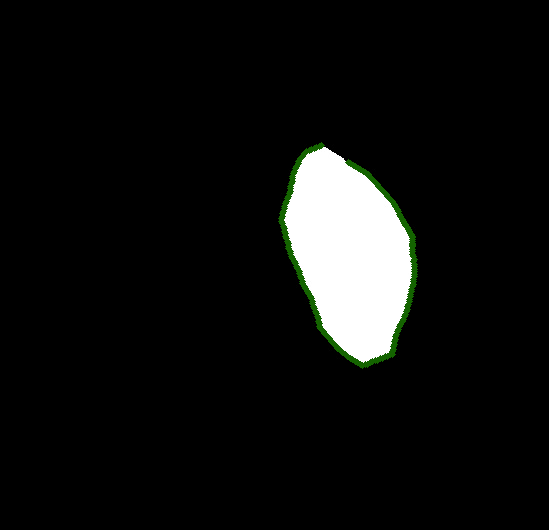

In [36]:
test_image_path = '../datasets/Kvasir-SEG/masks/cju1b75x63ddl0799sdp0i2j3.jpg'
test_image = cv2.imread(test_image_path)

def mask2points(mask: np.ndarray, point_num: int) -> np.ndarray:
    edge = cv2.Canny(mask, 50, 150)
    contours, _ = cv2.findContours(edge, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_NONE)
    roi_points = contours[0].reshape(-1, 2)
    
    roi_point_num = len(roi_points)
    if roi_point_num > point_num:
        indices = np.arange(0, roi_point_num, roi_point_num // point_num)
        left_points_num = roi_point_num % point_num
        
        if left_points_num > 0:
            gap = len(indices) // left_points_num
            for i in range(left_points_num):
                indices[i * gap: i * gap + gap] += i
                print(i * gap, i * gap + gap)
        
        print(indices)
        roi_points = roi_points[indices]
    return roi_points[:point_num]

draw_image = test_image.copy()
points = mask2points(test_image, point_num=200)
print(len(points))
for point in points:
    cv2.circle(draw_image, center=point, radius=1, color=(0, 100, 20), thickness=3)

Image.fromarray(draw_image[...,::-1])

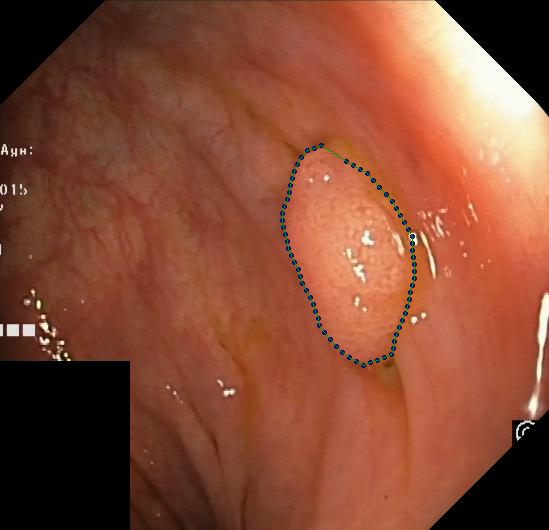

In [52]:
test_image_path = './aam_datasets/testset/cju1b75x63ddl0799sdp0i2j3.jpg'
test_image = cv2.imread(test_image_path)

pts_path = test_image_path.replace('.jpg', '.pts')
last_pts = None
first_pts = None
for line in open(pts_path, 'r', encoding='utf-8'):
    try:
        x, y = line.split()
        x = int(float(x))
        y = int(float(y))
        cv2.circle(test_image, (x, y), radius=1, thickness=2, color=(100, 20, 20))
        if last_pts:
            cv2.line(test_image, last_pts, (x, y), color=(20, 150, 0), thickness=1)
        last_pts = (x, y)
        if first_pts is None:
            first_pts = (x, y)
    except Exception as e:
        pass
    
cv2.line(test_image, first_pts, (x, y), color=(20, 150, 0), thickness=1)
Image.fromarray(test_image[..., ::-1])